<a href="https://colab.research.google.com/github/JS0501/ESAA_OB/blob/main/ESAA1107.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **2.4 파이토치 코드 맛보기**

In [2]:
import torch
import torch.nn as nn
import numpy as np # 벡터 및 행렬 연산에서 매우 편리한 기능을 제공하는 파이썬 라이브러리 패키지
import pandas as pd # 데이터 처리를 위해 널리 사용되는 파이썬 라이브러리 패키지
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/ESAA OB/car_evaluation.csv')
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


출력 결과 다섯 개의 행이 단어와 숫자로 구성되어 있는 것을 확인할 수 있다.

컴퓨터는 인간의 언어인 단어를 인식할 수 없기 때문에 단어를 벡터로 바꾸어 주는 임베딩(embedding) 처리가 필요하다.

주어진 데이터셋을 분포 형태로 시각화하여 표현한다.

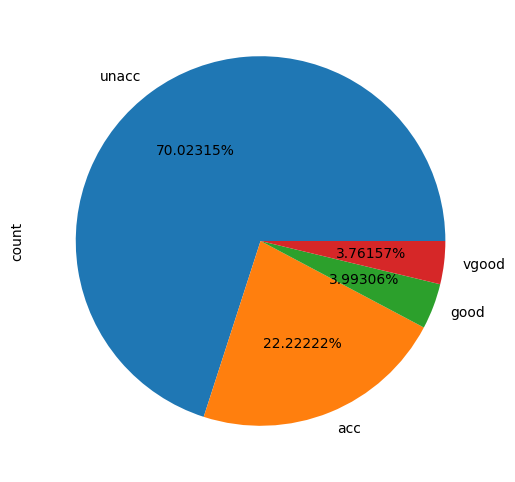

In [5]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind='pie',autopct='%0.05f%%')
colors = ['lightblue','lightgreen','orange','pink'], explode = (0.05,0.05,0.05,0.05)

대부분의 자동차(70%)는 허용 불가능한 상태에 있고 20%만 허용 가능한 수준이다.

즉, 양호한 상태의 자동차 비율이 매우 낮은 것을 볼 수 있다.

딥러닝은 통계 알고리즘을 기반으로 하기에 단어를 숫자(텐서)로 변환해야 한다.

주어진 데이터의 형태를 파악한 후 숫자로 변환해 주어야 하는데, 이 데이터의 칼럼들은 모두 범주형 데이터로 구성되어 있다.

먼저 astype() 메서드를 이용하여 범주 특성을 갖는 데이터를 범주형(category) 타입으로 변환한다.

또한, 파이토치를 이용한 모델 학습을 해야 하므로 범주형 타입을 텐서로 변환한다.

In [6]:
categorical_columns = ['price','maint','doors','persons','lug_capacity','safety'] # 예제 데이터셋 칼럼들의 목록

for category in categorical_columns:
  dataset[category] = dataset[category].astype('category') # astype() 메서드를 이용하여 데이터를 범주형으로 변환

price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

categorical_data = np.stack([price,maint,doors,persons,lug_capacity,safety],1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

파이토치로 모델을 학습시키기 위해서는 텐서 형태로 변환해야 하는데, 넘파이 배열을 통해 텐서를 생성할 수 있다.

범주형 데이터(단어)를 숫자(넘파이 배열)로 변환하기 위해 cat.codes를 사용한다.

cat.codes는 어떤 클래스가 어떤 숫자로 매핑되어 있는지 확인이 어려운 단점이 있으므로 주의해서 사용해야 한다.

np.stack은 두 개 이상의 넘파이 객체를 합칠 때 사용한다.

**np.stack과 np.concatenate**

차원 유지 여부 차이가 있다.

- np.concatenate: 선택한 축(axis)을 기준으로 두 개의 배열을 연결.

- np.stack: 배열들을 새로운 축으로 합침. 예를 들어 1차원 배열들을 합쳐서 2차원 배열을 만들거나 2차원 배열 여러 개를 합쳐 3차원 배열을 만듦. 따라서 반드시 두 배열의 차원이 동일해야 함.

In [7]:
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
c = np.array([[5,6],[7,8],[9,10]])

print(np.concatenate((a,b),axis=0))
print('---------------------------')
print(np.stack((a,b),axis=0))

[[1 2]
 [3 4]
 [5 6]
 [7 8]]
---------------------------
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


In [8]:
print(np.concatenate((a,c),axis=0))

[[ 1  2]
 [ 3  4]
 [ 5  6]
 [ 7  8]
 [ 9 10]]


In [10]:
# print(np.stack((a,c),axis=0))

np.stack은 합치려는 두 넘파이 배열의 차원이 다르기에 오류가 발생한다.

이제 torch 모듈을 이용하여 배열을 텐서로 변환한다.

In [11]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

레이블(outputs)로 사용할 칼럼에 대해서도 텐서로 변환한다.

get_dummies를 이용하여 넘파이 배열로 변환한다.

In [13]:
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten() # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


get_dummies는 dummy variable로 만들어 주는 함수이다.

숫자를 (0,1)로 바꾸어 준다는 것이다.

**ravel(), reshape(), flatten()**

ravel(), reshape(), flatten()은 텐서의 차원을 바꿀 때 사용한다.

워드 임베딩은 유사한 단어끼리 유사하게 인코딩되도록 표현하는 방법이다.

또한 높은 차원의 임베딩일수록 단어 간의 세부적인 관계를 잘 파악할 수 있다.

따라서 단일 숫자로 변환된 넘파이 배열을 N차원으로 변경하여 사용한다.

배열을 N차원으로 변환하기 위해 먼저 모든 범주형 칼럼에 대한 임베딩 크기(벡터 차원)를 정의한다.

임베딩 크기에 대한 정확한 규칙은 없지만, 칼럼의 고유 값 수를 2로 나누는 것을 많이 사용한다.

예를 들어 price 칼럼은 네 개의 고유 값을 갖기에 임베딩 크기는 4/2=2이다.

In [14]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in
                            categorical_columns]
categorical_embedding_sizes = [(col_size,min(50,(col_size+1)//2)) for col_size in
                               categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


데이터셋을 훈련과 테스트 용도로 분리한다.

In [15]:
total_records = 1728
test_records = int(total_records * .2) # 전체 데이터 중 20%를 테스트 용도로 사용

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

데이터를 훈련과 테스트 용도로 올바르게 분할했는지 확인하기 위해 레코드 개수를 출력한다.

In [16]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


데이터 준비가 끝났으므로, 모델의 네트워크를 생성한다.

In [27]:
class Model(nn.Module): ### 1
    def __init__(self, embedding_size, output_size, layers, p=0.4): ### 2
        super().__init__() ### 3
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni,
                                     nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols #입력층의 크기를 찾기 위해 범주형 칼럼 개수를 input_size 변수에 저장

        for i in layers: ### 4
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical): ### 5
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
           embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1) #넘파이의 concatenate와 같지만 대상이 텐서
        x = self.embedding_dropout(x)
        x = self.layers(x)

        return x

1. 클래스(class) 형태로 구현되는 모델은 nn.Module을 상속받는다.

2. __init__()은 모델에서 사용될 파라미터와 신경망을 초기화하기 위한 용도로 사용하며, 객체가 생성될 때 자동으로 호출된다.

- self: 첫번째 파라미터는 self를 지정해야 하며 자기 자신을 의미한다.

- embedding_size: 범주형 칼럼의 임베딩 크기

- output_size: 출력층의 크기

- layers: 모든 계층에 대한 목록

- p: 드롭아웃(기본값은 0.5)

3. super().__init__()은 부모 클래스(nn.Module)에 접근할 때 사용한다.

4. 모델의 네트워크 계층을 구축하기 위해 for 문을 이용하여 각 계층을 all_layers 목록에 추가한다.

5. forward() 함수는 학습 데이터를 입력받아서 연산을 수행한다.

In [28]:
model = Model(categorical_embedding_sizes,4,[200,100,50],p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0-2): 3 x Embedding(4, 2)
    (3-5): 3 x Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


모델에 대한 구조(네트워크)를 보여준다.

모델을 훈련시키기 전에 손실 함수와 옵티마이저에 대해 정의한다.

데이터 분류기에 cross entropy 손실 함수를 사용한다.

옵티마이저는 Adam을 사용한다.

In [29]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [30]:
if torch.cuda.is_available():
  device = torch.device('cuda') # GPU가 있다면 GPU를 사용
else:
  device = torch.device('cpu') # GPU가 없다면 CPU를 사용

In [31]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)
for i in range(epochs): # for문은 500회 반복되며, 각 반복마다 손실 함수가 오차를 계산
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss) # 반복할 때마다 오차를 aggregated_losses에 추가

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward() # 가중치를 업데이트하기 위해 손실 함수의 backward() 메서드 호출
    optimizer.step() # 옵티마이저 함수의 step() 메서드를 이용하여 기울기 업데이트


print(f'epoch: {i:3} loss: {single_loss.item():10.10f}') # 오차가 25 에포크마다 출력

epoch:   1 loss: 1.58658886
epoch:  26 loss: 1.36535633
epoch:  51 loss: 1.26439905
epoch:  76 loss: 1.16389918
epoch: 101 loss: 1.04917836
epoch: 126 loss: 0.93014526
epoch: 151 loss: 0.82114464
epoch: 176 loss: 0.76103127
epoch: 201 loss: 0.70012200
epoch: 226 loss: 0.65125352
epoch: 251 loss: 0.63241971
epoch: 276 loss: 0.61926210
epoch: 301 loss: 0.60314047
epoch: 326 loss: 0.60112864
epoch: 351 loss: 0.58798409
epoch: 376 loss: 0.58180857
epoch: 401 loss: 0.57840055
epoch: 426 loss: 0.57787389
epoch: 451 loss: 0.57712287
epoch: 476 loss: 0.57211834
epoch: 500 loss: 0.5755385756


학습이 끝났으므로 테스트 데이터셋으로 예측을 진행한다.

In [32]:
test_outputs = test_outputs.to(device=device,dtype=torch.int64)
with torch.no_grad():
  y_val = model(categorical_test_data)
  loss = loss_function(y_val,test_outputs)
print(f'Loss:{loss:.8f}')

Loss:0.54518116


테스트 데이터셋에 대한 손실 값을 보여준다.

이 값은 훈련 데이터셋에서 도출된 손실 값과 비슷하므로 과적합은 발생하지 않았다고 판단할 수 있다.

이제 테스트 데이터셋을 이용했을 때 모델이 얼마나 잘 예측하는지 살펴본다.

앞에서 모델 네트워크의 output_size에 4를 지정했다.

즉, 출력층에 네 개의 뉴런이 포함되도록 지정했으므로 각 예측에는 네 개의 값이 포함된다.

In [33]:
print(y_val[:5])

tensor([[ 2.6034,  1.5431, -3.1568, -2.9887],
        [ 1.5308,  0.8521, -1.7835, -1.6768],
        [ 5.6242,  4.4295, -5.6342, -5.6747],
        [ 3.2877,  2.3700, -3.5876, -3.5653],
        [ 2.4395,  1.3442, -2.5121, -2.6511]])


값이 출력되었지만 어떤 의미인지 이해하기 어려워 보인다.

따라서 다음과 같은 코드를 이용하여 목록에서 가장 큰 값을 갖는 인덱스를 알아본다.

**실제값이 아닌 인덱스를 찾는 것이다.**

In [34]:
y_val = np.argmax(y_val,axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


출력 결과 모두 인덱스 0이 출력되었다.

즉, 인덱스가 0인 값이 인덱스가 1인 값보다 크므로 처리된 출력이 0임을 확인할 수 있다.

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs,y_val))

[[258   1]
 [ 83   3]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       259
           1       0.75      0.03      0.07        86

    accuracy                           0.76       345
   macro avg       0.75      0.52      0.46       345
weighted avg       0.75      0.76      0.66       345

0.7565217391304347


신경망에서 필요한 모든 파라미터를 무작위로 선택했다는 것을 감안할 때 75%의 정확도는 나쁘지 않다.

파라미터(훈련/테스트 데이터셋 분할, 은닉층 개수 및 크기 등)를 변경하며 더 나은 성능을 찾아보는 것도 학습에 도움이 된다.

마지막으로 딥러닝 분류 모델의 성능 평가 지표를 알아본다.

성능 평가 지표로 정확도(accuraccy), 재현율(recall), 정밀도(precision), F1-스코어(F1-score)가 있다.